In [1]:
# import jqdata as jq
import jqdatasdk as jq
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# ebablbe auto-completion
%config Completer.use_jedi = False

plt.style.context

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
a =""
a.st

In [2]:
jq.auth('15821805807','!QAZse4rfvgy7')

auth success 


In [3]:
def plot_lines(df, x, y, group_by=None, figsize=(20, 10)):
    fig, ax = plt.subplots()
    if figsize is not None:
        fig.figure(figsize=figsize)
        
    if group_by is not None:
        for name, df_group in df.groupby(group_by):
            ax.plot(x, y, label=name, data=df_group)
    else:
        ax.plot(x, y, label=y, data=df)    
    ax.legend(loc='best')
    fig.tight_layout()
    fig.xticks(rotation=45)
    
    
def corrcoef(x, y, shift=0):
    if shift>0:
        x = x[0:-shift]
        y = y[shift:]
    return stats.pearsonr(x, y)[0]



In [4]:
fig, ax = plt.subplots()


# 获取宏观数据

## [房地产开发投资情况表(月度累计)](https://www.joinquant.com/help/api/help#macroData:%E6%88%BF%E5%9C%B0%E4%BA%A7%E5%BC%80%E5%8F%91%E6%8A%95%E8%B5%84%E6%83%85%E5%86%B5%E8%A1%A8%E6%9C%88%E5%BA%A6%E7%B4%AF%E8%AE%A1)


| 列名                   | 列的含义                            | 类型 | 单位 | 说明                                                         |
| :--------------------- | :---------------------------------- | :--- | :--- | :----------------------------------------------------------- |
| id                     | id                                  | 数字 |      |                                                              |
| stat_month             | 统计月份                            | 文本 |      | YYY-MM                                                       |
| invest                 | 房地产投资_累计值                   | 数字 | 亿元 | 房地产开发投资指各种登记注册类型的房地产开发法人单位统一开发的包括统代建、拆迁还建的住宅、厂房、仓库、饭店、宾馆、度假村、写字楼、办公楼等房屋建筑物，配套的服务设施，土地开发工程(如道路、给水、排水、供电、供热、通讯、平整场地等基础设施工程)和土地购置的投资；不包括单纯的土地开发和交易活动。 |
| invest_yoy             | 房地产投资_累计增长                 | 数字 | %    |                                                              |
| auxiliary_project      | 房地产配套工程投资_累计值           | 数字 | 亿元 |                                                              |
| auxiliary_project_yoy  | 房地产配套工程投资_累计增长         | 数字 | %    |                                                              |
| resident               | 房地产住宅投资_累计值               | 数字 | 亿元 |                                                              |
| resident_yoy           | 房地产住宅投资_累计增长             | 数字 | %    |                                                              |
| below90_house          | 90平方米及以下住房投资_累计值       | 数字 | 亿元 |                                                              |
| below90_house_yoy      | 90平方米及以下住房投资_累计增长     | 数字 | %    |                                                              |
| above144_house         | 144平方米以上住房投资_累计值        | 数字 | 亿元 |                                                              |
| above144_house_yoy     | 144平方米以上住房投资_累计增长      | 数字 | %    |                                                              |
| villa_flat             | 别墅、高档公寓投资_累计值           | 数字 | 亿元 |                                                              |
| villa_flat_yoy         | 别墅、高档公寓投资_累计增长         | 数字 | %    |                                                              |
| office                 | 房地产办公楼投资_累计值             | 数字 | 亿元 |                                                              |
| office_yoy             | 房地产办公楼投资_累计增长           | 数字 | %    |                                                              |
| business               | 房地产商业营业用房投资_累计值       | 数字 | 亿元 |                                                              |
| business_yoy           | 房地产商业营业用房投资_累计增长     | 数字 | %    |                                                              |
| other_house            | 其它房地产投资_累计值               | 数字 | 亿元 |                                                              |
| other_house_yoy        | 其它房地产投资_累计增长             | 数字 | %    |                                                              |
| construct              | 房地产开发建筑工程投资_累计值       | 数字 | 亿元 |                                                              |
| construct_yoy          | 房地产开发建筑工程投资_累计增长     | 数字 | %    |                                                              |
| install                | 房地产开发安装工程投资_累计值       | 数字 | 亿元 |                                                              |
| install_yoy            | 房地产开发安装工程投资_累计增长     | 数字 | %    |                                                              |
| equipment_purchase     | 房地产设备工器具购置投资_累计值     | 数字 | 亿元 |                                                              |
| equipment_purchase_yoy | 房地产设备工器具购置投资_累计增长   | 数字 | %    |                                                              |
| other_expense          | 房地产其它费用投资_累计值           | 数字 | 亿元 |                                                              |
| other_expense_yoy      | 房地产其它费用投资_累计增长         | 数字 | %    |                                                              |
| land_purchase          | 房地产土地购置费_累计值             | 数字 | 亿元 |                                                              |
| land_purchase_yoy      | 房地产土地购置费_累计增长           | 数字 | %    |                                                              |
| plan_invest            | 房地产开发计划总投资_累计值         | 数字 | 亿元 |                                                              |
| plan_invest_yoy        | 房地产开发计划总投资_累计增长       | 数字 | %    |                                                              |
| new_fixed_assets       | 房地产开发新增固定资产投资_累计值   | 数字 | 亿元 |                                                              |
| new_fixed_assets_yoy   | 房地产开发新增固定资产投资_累计增长 | 数字 | %    |                                                              |

In [3]:
q = jq.query(jq.macro.MAC_INDUSTRY_ESTATE_INVEST_MONTH).order_by('stat_month')
df = jq.macro.run_query(q)
print(len(df))
df.tail()

timeout: timed out

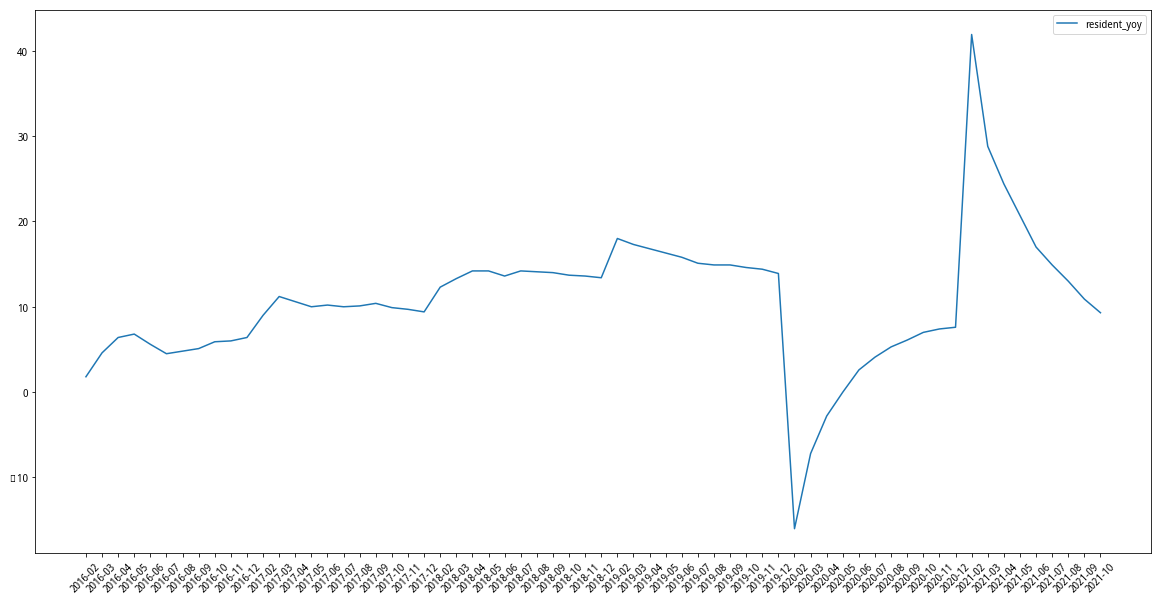

In [75]:
df_filter = df.loc[(df.stat_month>='201501')]
plot_lines(df_filter, 'stat_month', 'resident_yoy')
plt.show()

## 70个大中城市房屋销售价格指数(月度) 

- [住宅销售价格指数](https://baike.baidu.com/item/%E4%BD%8F%E5%AE%85%E9%94%80%E5%94%AE%E4%BB%B7%E6%A0%BC%E6%8C%87%E6%95%B0/7639384)
- [Join Quant - 70个大中城市房屋销售价格指数(月度)](https://www.joinquant.com/help/api/help#macroData:70%E4%B8%AA%E5%A4%A7%E4%B8%AD%E5%9F%8E%E5%B8%82%E6%88%BF%E5%B1%8B%E9%94%80%E5%94%AE%E4%BB%B7%E6%A0%BC%E6%8C%87%E6%95%B0%E6%9C%88%E5%BA%A6)

| 列名                               | 列的含义                             | 类型 | 单位 | 说明                        |
| :--------------------------------- | :----------------------------------- | :--- | :--- | :-------------------------- |
| id                                 | id                                   | 数字 |      |                             |
| stat_month                         | 统计月份                             | 文本 |      | YYYY-MM                     |
| area_code                          | 地区代码                             | 文本 |      | 关联:MAC_AREA_DIV.area_code |
| area_name                          | 地区名称                             | 文本 |      |                             |
| fixed_base_type                    | 指数定基类型                         | 文本 |      |                             |
| resident_idx                       | 新建住宅销售价格指数                 | 数字 |      |                             |
| commodity_house_idx                | 新建商品住宅销售价格指数             | 数字 |      |                             |
| second_hand_idx                    | 二手住宅销售价格指数                 | 数字 |      |                             |
| commodity_house_below90_idx        | 90平米及以下新建商品住宅销售价格指数 | 数字 |      |                             |
| second_hand_below90_idx            | 90平米及以下二手住宅销售价格指数     | 数字 |      |                             |
| commodity_house_between_90_140_idx | 90-144平米新建商品住宅销售价格指数   | 数字 |      |                             |
| second_hand_between_90_140_idx     | 90-144平米二手住宅销售价格指数       | 数字 |      |                             |
| commodity_house_above140_idx       | 144平米以上新建商品住宅销售价格指数  | 数字 |      |                             |
| second_house_above140_idx          | 144平米以上二手住宅销售价格指数      | 数字 |      |                             |

In [76]:
# 70个大中城市房屋销售价格指数(月度) 详见 https://baike.baidu.com/item/%E4%BD%8F%E5%AE%85%E9%94%80%E5%94%AE%E4%BB%B7%E6%A0%BC%E6%8C%87%E6%95%B0/7639384

dfs = []

for area_name in ['上海', '深圳', '北京']:
    q = jq.query(jq.macro.MAC_INDUSTRY_ESTATE_70CITY_INDEX_MONTH)
    q = q.filter(jq.macro.MAC_INDUSTRY_ESTATE_70CITY_INDEX_MONTH.area_name==area_name)
    df = jq.macro.run_query(q)
    print(f'{area_name}:{len(df)} from {df.stat_month.min()} {df.stat_month.max()}')
    dfs.append(df)

df = pd.concat(dfs).sort_values('stat_month', ascending=True)
print(len(df))
print(df.fixed_base_type.unique())
df.tail(10)

上海:487 from 2006-01 2021-10
深圳:487 from 2006-01 2021-10
北京:487 from 2006-01 2021-10
1461
[上年=100 上月=100 2015=100]


,id,stat_month,area_code,area_name,fixed_base_type,resident_idx,commodity_house_idx,second_hand_idx,commodity_house_below90_idx,second_hand_below90_idx,commodity_house_between_90_140_idx,second_hand_between_90_140_idx,commodity_house_above140_idx,second_house_above140_idx
483,47803,2021-07,310000,上海,2015=100,NaN,104.8,110.3,104.7,110.7,104.5,110.0,105.3,109.9
484,47926,2021-08,310000,上海,上月=100,NaN,100.4,100.2,100.0,100.0,100.6,100.3,100.1,100.6
484,47959,2021-08,440300,深圳,上月=100,NaN,101.0,99.6,100.9,99.6,101.2,99.7,100.5,99.5
484,47910,2021-08,110000,北京,上月=100,NaN,100.2,100.4,100.1,100.2,100.5,100.4,100.0,100.8
485,47996,2021-09,310000,上海,上月=100,NaN,100.2,99.4,100.0,99.2,100.0,99.6,100.4,99.7
485,47980,2021-09,110000,北京,上月=100,NaN,100.0,99.8,99.9,99.6,100.0,99.9,100.0,100.0
485,48029,2021-09,440300,深圳,上月=100,NaN,100.2,99.5,100.4,99.4,100.1,99.4,100.1,99.8
486,48066,2021-10,310000,上海,上月=100,NaN,100.1,99.6,100.0,99.6,100.0,99.8,100.3,99.1
486,48099,2021-10,440300,深圳,上月=100,NaN,99.8,99.8,99.7,99.7,99.7,99.9,100.2,100.2
486,48050,2021-10,110000,北京,上月=100,NaN,100.6,99.5,100.4,99.2,100.3,99.9,100.9,99.9


In [77]:
# # 之前指数是上个月的
# df['commodity_house_price'] = df.groupby('area_name')['commodity_house_idx'].transform(lambda g: g.cumprod())

df1 = df.loc[(df.stat_month>='2016-01') & (df.area_name=='上海') & (df.fixed_base_type=='上月=100')].copy()
df1['commodity_house_price'] = df1['commodity_house_idx']/100
df1['commodity_house_price'] = 100*df1.groupby('area_name')['commodity_house_price'].transform(lambda g: g.cumprod()).round(3)
df1[['stat_month', 'commodity_house_idx', 'commodity_house_price', 'second_hand_idx']]

,stat_month,commodity_house_idx,commodity_house_price,second_hand_idx
55,2016-01,102.6,102.6,102.7
54,2016-02,102.9,105.6,105.3
53,2016-03,104.3,110.1,106.2
52,2016-04,103.6,114.1,102.5
51,2016-05,102.3,116.7,101.4
50,2016-06,102.4,119.5,102.2
49,2016-07,101.4,121.2,102.0
58,2016-08,105.2,127.5,103.7
57,2016-09,103.2,131.6,103.4
86,2016-10,100.5,132.2,100.3


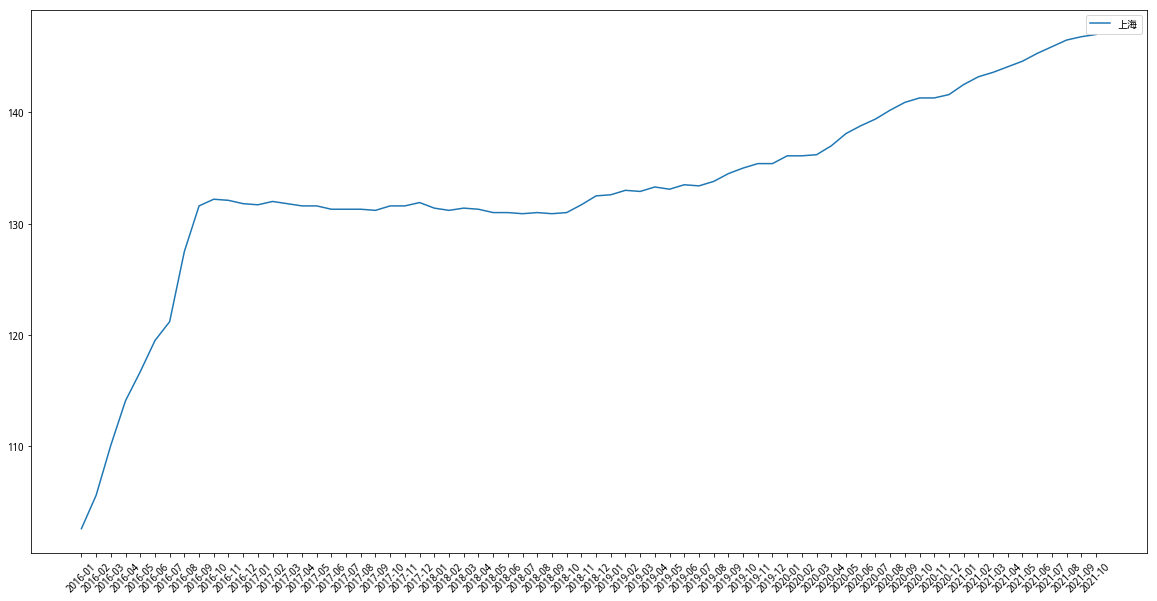

In [78]:
df_filter = df1
plot_lines(df_filter, 'stat_month', 'commodity_house_price', 'area_name')
plt.show()

In [79]:
df2 = df.loc[(df.stat_month>='2016-01') & (df.area_name=='上海') & (df.fixed_base_type=='2015=100')]
df2[['stat_month', 'commodity_house_idx', 'second_hand_idx']]

,stat_month,commodity_house_idx,second_hand_idx
326,2016-01,113.3,109.0
325,2016-02,116.6,114.8
324,2016-03,121.6,122.0
323,2016-04,126.0,125.0
322,2016-05,128.8,126.7
321,2016-06,131.9,129.6
320,2016-07,133.8,132.1
328,2016-08,140.7,136.9
327,2016-09,145.1,141.5
343,2016-10,145.9,142.0


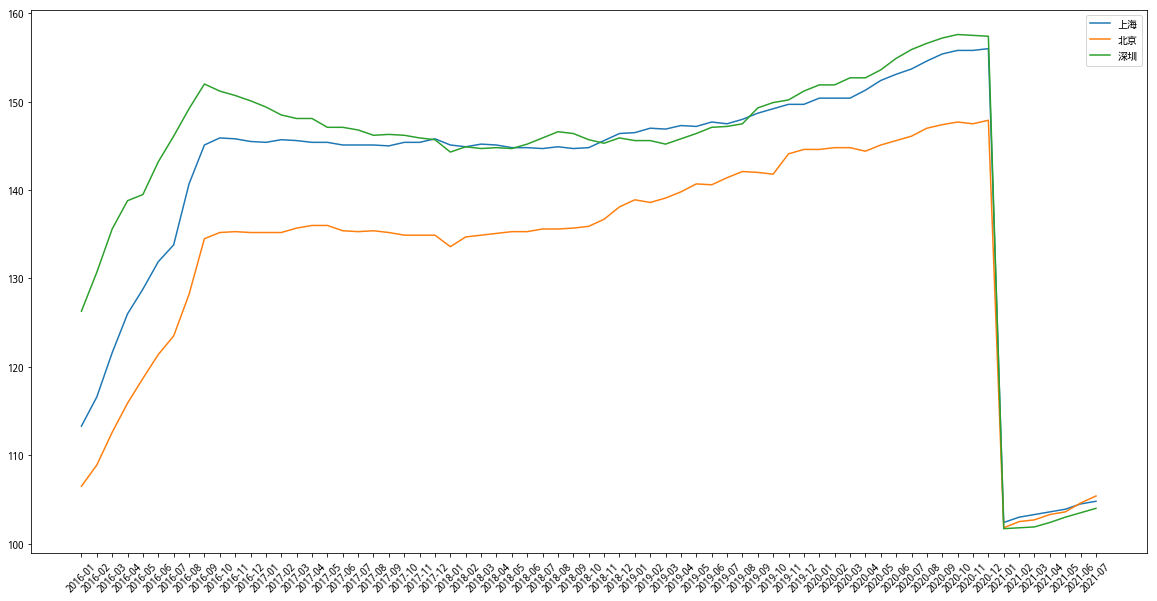

In [80]:
df_filter = df.loc[(df.stat_month>='2016-01') & (df.fixed_base_type=='2015=100')]
plot_lines(df_filter, 'stat_month', 'commodity_house_idx', 'area_name')
plt.show()

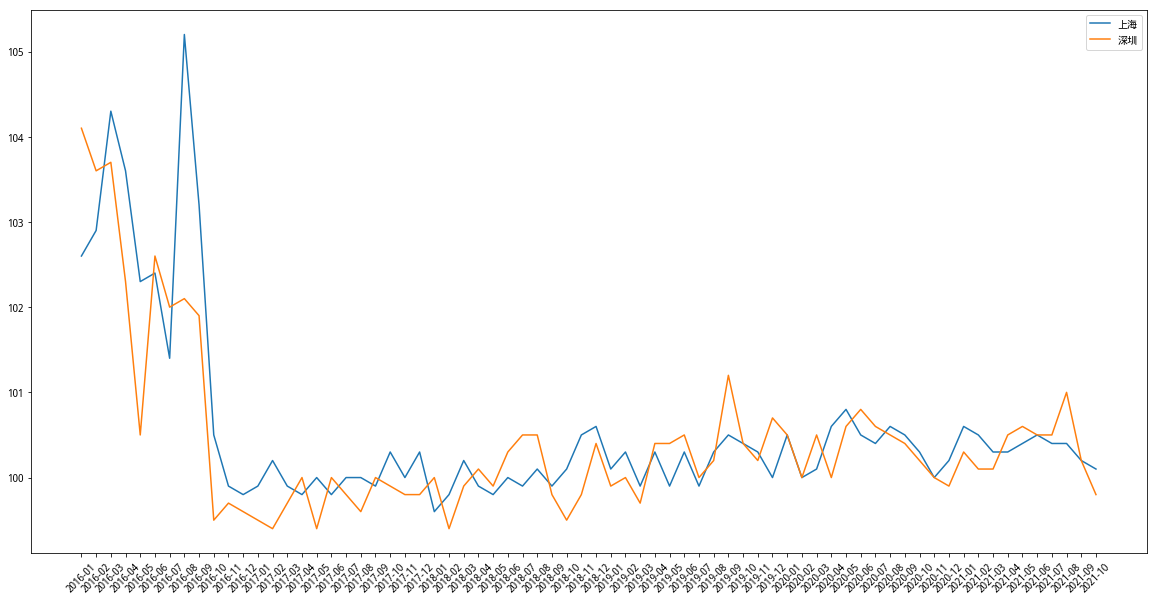

In [81]:
df_filter = df.loc[(df.area_name.isin(['上海', '深圳']))  & (df.fixed_base_type=='上月=100') & (df.stat_month>='2016-01')]
plot_lines(df_filter, 'stat_month', 'commodity_house_idx', 'area_name')
plt.show()

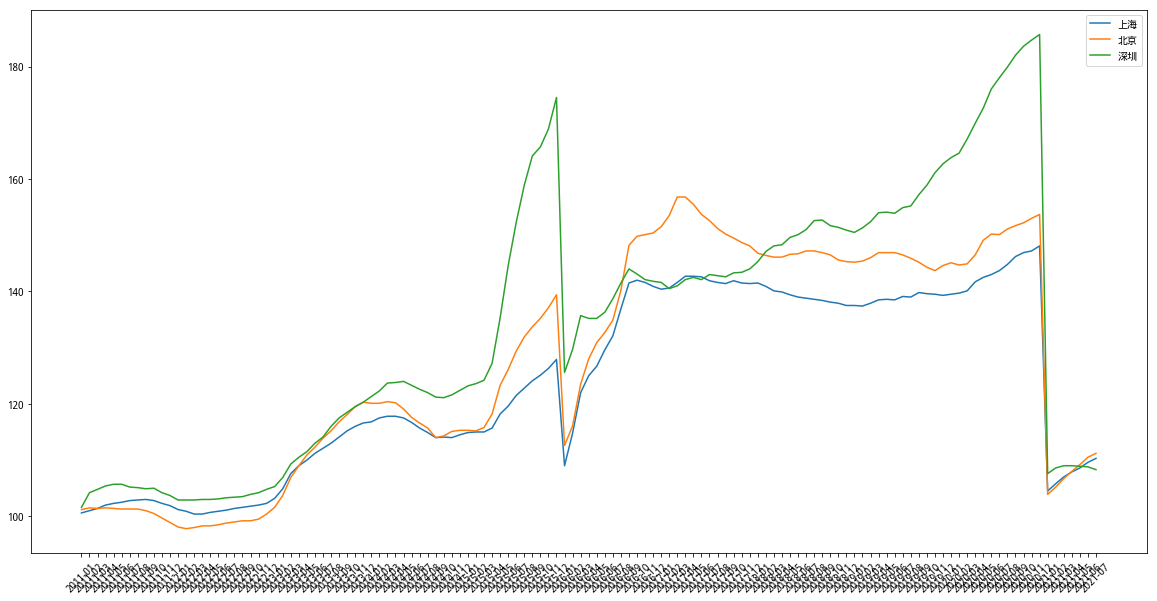

In [82]:
df_filter = df.loc[(df.fixed_base_type=='2015=100')]
plot_lines(df_filter, 'stat_month', 'second_hand_idx', 'area_name')
plt.show()

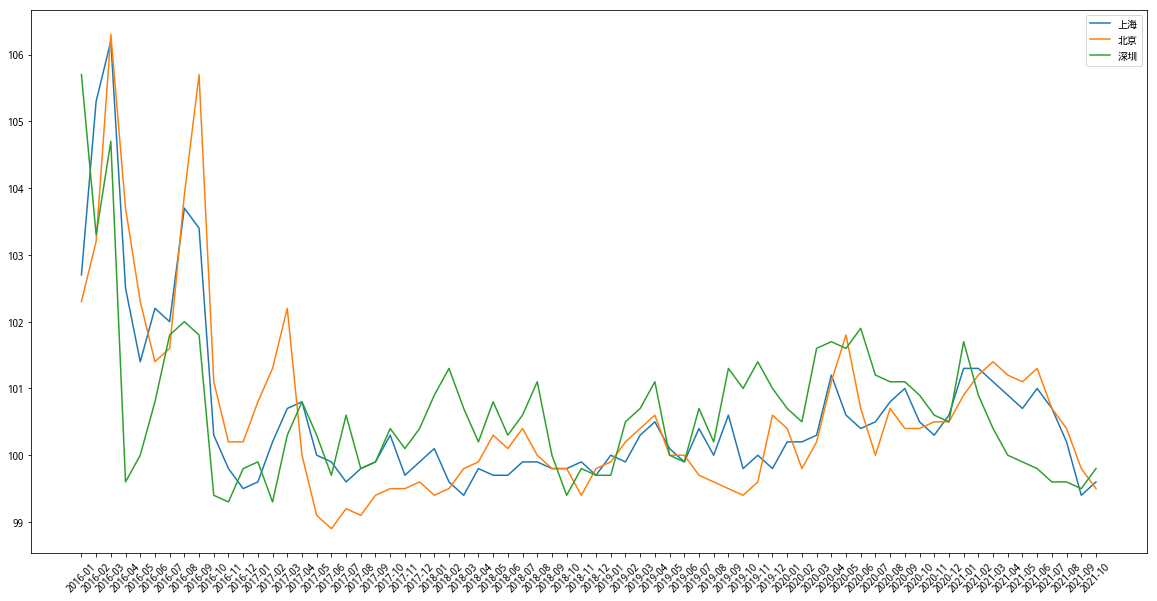

In [83]:
df_filter = df.loc[(df.fixed_base_type=='上月=100') & (df.stat_month>='2016-01')]
plot_lines(df_filter, 'stat_month', 'second_hand_idx', 'area_name')
plt.show()

## 分地区城镇登记失业率（年度）

In [84]:
q = jq.query(jq.macro.MAC_AREA_UNEMPLOY).order_by('stat_year')
df = jq.macro.run_query(q)
print(len(df))
df.tail()

1268


,id,stat_year,area_code,area_name,unemploy,unemploy_rate
1263,1705,2019,130000,河北省,36.0,3.1
1264,1714,2019,530000,云南省,22.9,3.3
1265,1723,2019,370000,山东省,44.2,3.3
1266,1732,2019,310000,上海市,19.3,3.5
1267,1741,2019,420000,湖北省,37.6,2.4


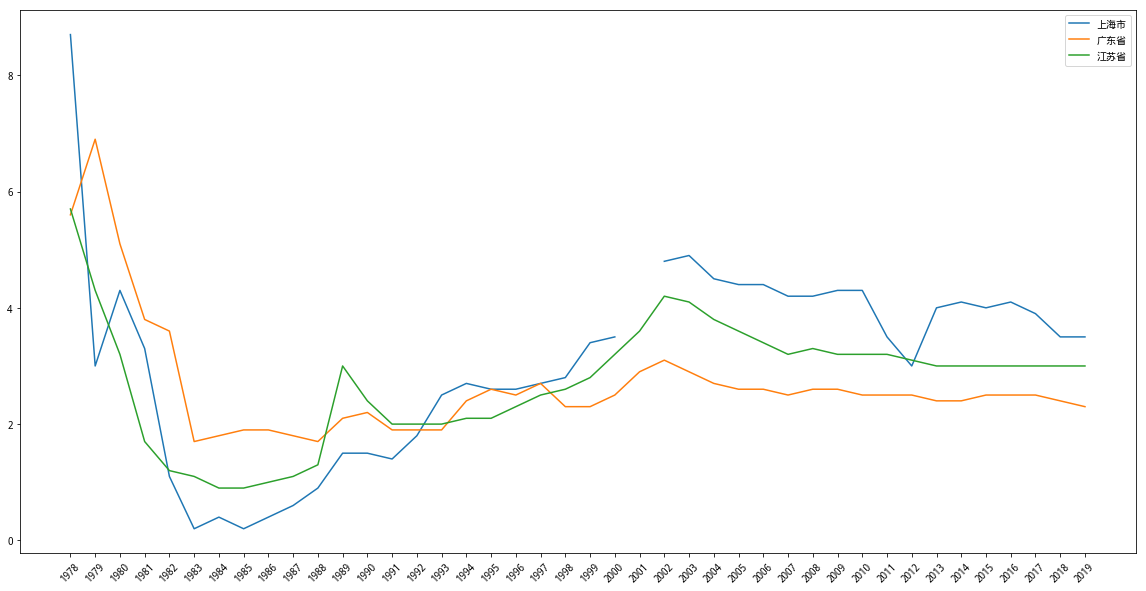

In [89]:
df_filter = df.loc[(df.area_name.isin(['上海市', '广东省', '江苏省']))]
plot_lines(df_filter, 'stat_year', 'unemploy_rate', 'area_name')
plt.show()

## [各地区森林资源情况表（年度）](https://www.joinquant.com/help/api/help#macroData:%E5%90%84%E5%9C%B0%E5%8C%BA%E6%A3%AE%E6%9E%97%E8%B5%84%E6%BA%90%E6%83%85%E5%86%B5%E8%A1%A8%EF%BC%88%E5%B9%B4%E5%BA%A6%EF%BC%89)

| 列名                         | 列的含义       | 类型 | 单位     | 说明                                                         |
| :--------------------------- | :------------- | :--- | :------- | :----------------------------------------------------------- |
| id                           | id             | 数字 |          |                                                              |
| stat_year                    | 统计年份       | 文本 |          | YYYY                                                         |
| area_code                    | 地区代码       | 文本 |          | 关联:MAC_AREA_DIV.area_code                                  |
| area_name                    | 地区名称       | 文本 |          |                                                              |
| forestry_land_area           | 林业用地面积   | 数字 | 万公顷   | 人工林面积指由人工播种、植苗或扦插造林形成的生长稳定，(一般造林3-5年后或飞机播种5-7年后)每公顷保存株数大于或等于造林设计植树株数80%或郁闭度0.20以上(含0.20)的林分面积。 |
| forest_area                  | 森林面积       | 数字 | 万公顷   | 森林面积包括郁闭度0.2以上的乔木林地面积和竹林面积，国家特别规定的灌木林地面积，农田林网以及村旁、路旁、水旁、宅旁林木的覆盖面积。 |
| man_made_forest_area         | 人工林面积     | 数字 | 万公顷   |                                                              |
| forest_cover_rate            | 森林覆盖率     | 数字 | %        | 森林覆盖率指以行政区域为单位的森林面积占区域土地总面积的百分比。计算公式为：森林覆盖率=森林面积/土地总面积×100%。 |
| standing_forest_stock_volume | 活立木总蓄积量 | 数字 | 亿立方米 | 活立木总蓄积量指一定范围土地上全部树木蓄积的总量，包括森林蓄积、疏林蓄积、散生木蓄积和四旁树蓄积。 |
| forest_stand_volume          | 森林蓄积量     | 数字 | 亿立方米 | 森林蓄积量指一定森林面积上存在着的林木树干部分的总材积。     |

In [95]:
q = jq.query(jq.macro.MAC_RESOURCES_AREA_FOREST).order_by('stat_year')
df = jq.macro.run_query(q)
print(len(df))
print(df.area_name.unique())
df.tail()

523
[北京市 甘肃省 安徽省 辽宁省 山西省 上海市 宁夏回族自治区 青海省 江西省 江苏省 新疆维吾尔自治区 河北省 黑龙江省 云南省 浙江省 广东省
 重庆市 天津市 河南省 吉林省 湖南省 福建省 内蒙古自治区 海南省 西藏自治区 贵州省 四川省 山东省 湖北省 陕西省 广西壮族自治区
 香港特别行政区 澳门特别行政区 台湾省]


,id,stat_year,area_code,area_name,forestry_land_area,forest_area,man_made_forest_area,forest_cover_rate,standing_forest_stock_volume,forest_stand_volume
518,1023,2019,340000,安徽省,449.33,395.85,232.91,28.6,2.61,2.22
519,1039,2019,320000,江苏省,174.98,155.99,150.83,15.2,0.96,0.70
520,1055,2019,110000,北京市,107.10,71.82,43.48,43.8,0.30,0.24
521,1071,2019,650000,新疆维吾尔自治区,1371.26,802.23,121.42,4.9,4.65,3.92
522,889,2019,310000,上海市,10.19,8.90,8.90,14.0,0.07,0.04


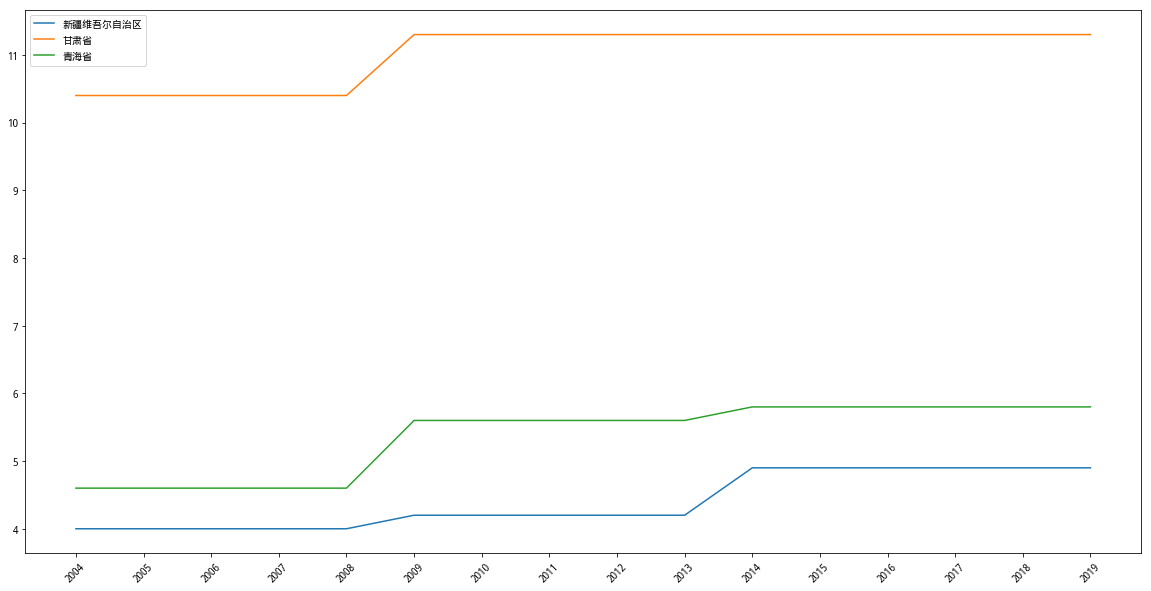

In [100]:
df_filter = df.loc[(df.area_name.isin(['新疆维吾尔自治区', '青海省', '甘肃省']))]
plot_lines(df_filter, 'stat_year', 'forest_cover_rate', 'area_name')
plt.show()

## [货币供应量(月度)](https://www.joinquant.com/help/api/help#macroData:%E8%B4%A7%E5%B8%81%E4%BE%9B%E5%BA%94%E9%87%8F%E6%9C%88%E5%BA%A6)


| 列名       | 列的含义                         | 类型 | 单位 | 说明                         |
| :--------- | :------------------------------- | :--- | :--- | :--------------------------- |
| id         | id                               | 数字 |      |                              |
| stat_month | 统计月份                         | 文本 |      | YYYY-MM                      |
| m2         | 货币和准货币(M2)供应量           | 数字 |      |                              |
| m1         | 货币(M1)供应量                   | 数字 |      | 货币=流通中货币+单位活期存款 |
| m0         | 流通中现金(M0)供应量             | 数字 |      |                              |
| m2_yoy     | 货币和准货币(M2)供应量同比增长率 | 数字 |      |                              |
| m1_yoy     | 货币(M1)供应量同比增长率         | 数字 |      |                              |
| m0_yoy     | 流通中现金(M0)供应量同比增长率   | 数字 |      |                              |

In [152]:
q = jq.query(jq.macro.MAC_MONEY_SUPPLY_MONTH).order_by('stat_month')
df = jq.macro.run_query(q)
print(len(df))
print(df.stat_month.min())
df.tail()

263
1999-12


,id,stat_month,m2,m1,m0,m2_yoy,m1_yoy,m0_yoy
258,15393,2021-06,2317788.36,637479.36,84346.97,8.6,5.5,6.2
259,16184,2021-07,2302153.82,620367.05,84717.56,8.3,4.9,6.1
260,16251,2021-08,2312267.68,626658.69,85059.20,8.2,4.2,6.3
261,17079,2021-09,2342829.70,624645.68,86867.09,8.3,3.7,5.5
262,17728,2021-10,2336160.48,626082.12,86085.78,8.7,2.8,6.2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Second argument 'm1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


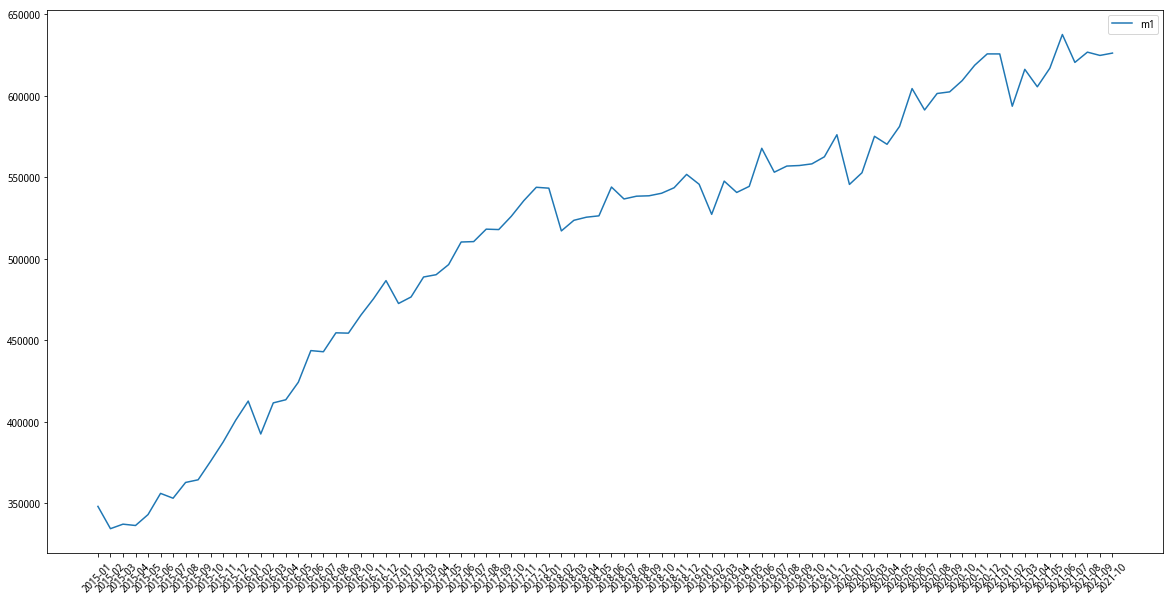

In [111]:
df_filter = df.loc[(df.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm1')
plt.show()

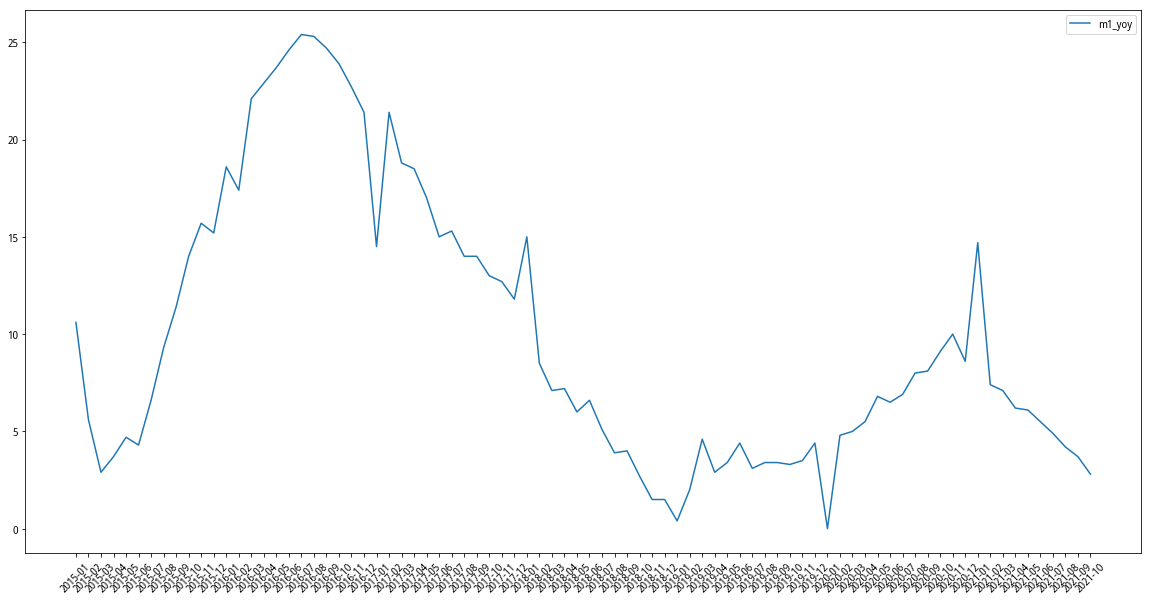

In [108]:
df_filter = df.loc[(df.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm1_yoy')
plt.show()

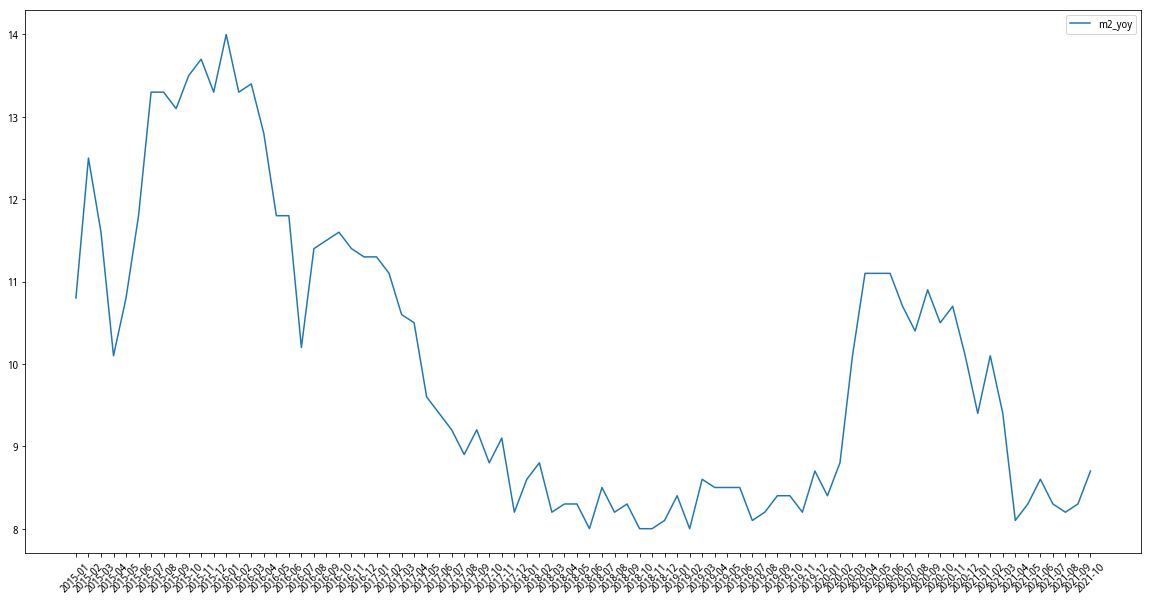

In [109]:
df_filter = df.loc[(df.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm2_yoy')
plt.show()

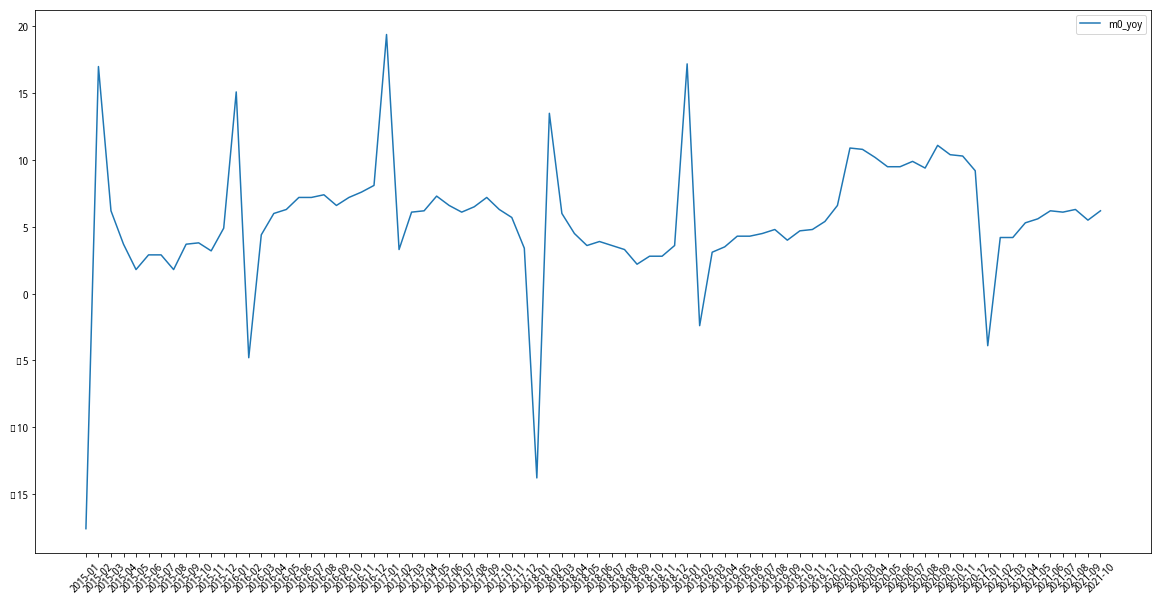

In [110]:
df_filter = df.loc[(df.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm0_yoy')
plt.show()

In [ ]:
df_filter = df.loc[(df.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm0_yoy')
plt.show()

# 获取股票数据

## 获取股票概况

In [4]:
security = jq.get_security_info('000002.XSHE')
for name in ['display_name', 'name', 'start_date', 'end_date', 'type', 'parent']:
    print(getattr(security, name))

万科A
WKA
1991-01-29
2200-01-01
stock
None


## [获取行情数据](https://www.joinquant.com/help/api/help#Stock:%E8%8E%B7%E5%8F%96%E8%A1%8C%E6%83%85%E6%95%B0%E6%8D%AE)

In [5]:
df = get_price(security, start_date='2000-01-01', end_date='2021-12-30', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
df["stat_month"] = df.index.map(lambda x: str(x)[0:7])
print(df.index.min())
print(len(df))
df

2005-01-04 00:00:00
4131


,open,close,high,low,volume,money,stat_month
2005-01-04,0.92,0.93,0.94,0.91,58792580.0,5.451422e+07,2005-01
2005-01-05,0.92,0.96,0.96,0.92,99881377.0,9.478190e+07,2005-01
2005-01-06,0.96,0.96,0.96,0.94,104604205.0,9.925340e+07,2005-01
2005-01-07,0.95,0.97,0.99,0.95,100633214.0,9.756404e+07,2005-01
2005-01-10,0.97,0.96,0.98,0.96,40260610.0,3.883998e+07,2005-01
2005-01-11,0.96,0.97,0.97,0.96,33728143.0,3.258136e+07,2005-01
2005-01-12,0.98,0.97,0.98,0.95,42675965.0,4.138311e+07,2005-01
2005-01-13,0.97,0.98,0.98,0.97,52011544.0,5.069435e+07,2005-01
2005-01-14,0.98,0.96,0.99,0.96,47608754.0,4.632316e+07,2005-01
2005-01-17,0.96,0.96,0.97,0.95,56487590.0,5.408217e+07,2005-01


In [6]:
df_month = df.groupby('stat_month').mean()
df_month = df_month.reset_index()
df_month.head(10)

,stat_month,open,close,high,low,volume,money
0,2005-01,0.969000,0.975000,0.986000,0.959500,5.924704e+07,5.774273e+07
1,2005-02,1.050000,1.049231,1.070000,1.033846,1.008450e+08,1.059970e+08
2,2005-03,0.989565,0.988696,1.006087,0.976522,7.900032e+07,7.806830e+07
3,2005-04,1.010476,1.014286,1.026190,0.999048,7.368157e+07,7.456008e+07
4,2005-05,0.899412,0.889412,0.907647,0.875294,6.400530e+07,5.687929e+07
5,2005-06,0.841364,0.837727,0.851818,0.821364,9.083865e+07,7.655680e+07
6,2005-07,0.908095,0.916190,0.929048,0.897619,1.084394e+08,1.028459e+08
7,2005-08,1.033913,1.030870,1.048261,1.010000,1.975529e+08,2.055507e+08
8,2005-09,1.010000,1.009545,1.022727,0.997727,9.716215e+07,9.913664e+07
9,2005-10,1.012500,1.012500,1.019375,1.004375,9.138148e+07,9.516550e+07


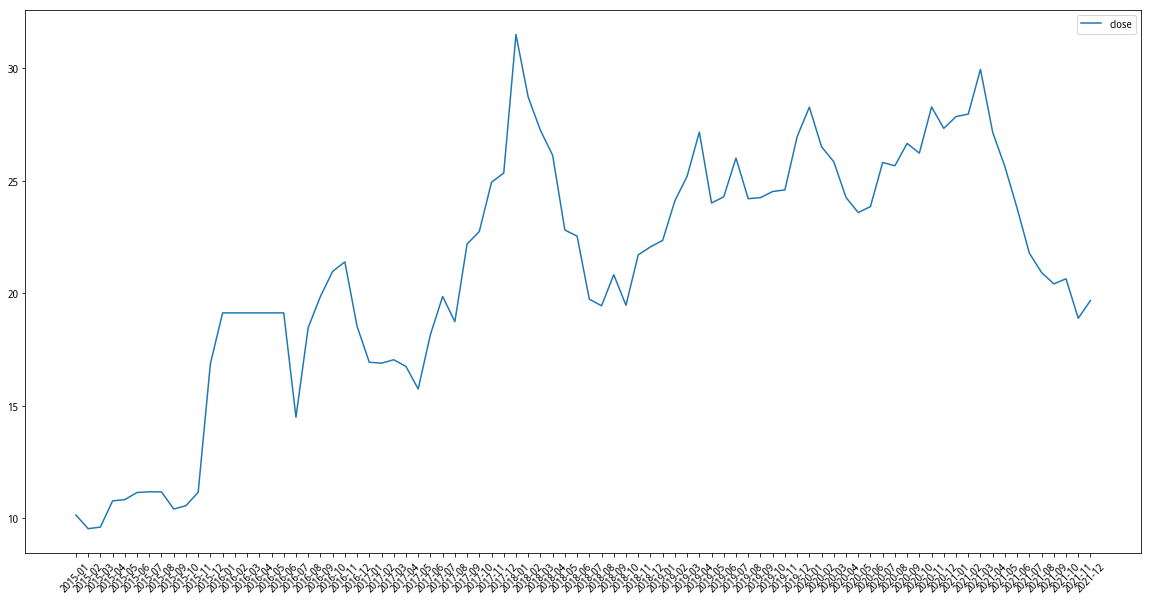

In [7]:
df_filter = df_month.loc[(df_month.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'close')
plt.show()

# 个股分析

## 货币供应和万科股价关系

以下分析，可以得出如下结论。

- 万科的股价和货币龚

In [8]:
q = jq.query(jq.macro.MAC_MONEY_SUPPLY_MONTH).order_by('stat_month')
df_money = jq.macro.run_query(q)
print(len(df_money))
print(df_money.stat_month.min())
df_money.tail()

263
1999-12


,id,stat_month,m2,m1,m0,m2_yoy,m1_yoy,m0_yoy
258,15393,2021-06,2317788.36,637479.36,84346.97,8.6,5.5,6.2
259,16184,2021-07,2302153.82,620367.05,84717.56,8.3,4.9,6.1
260,16251,2021-08,2312267.68,626658.69,85059.20,8.2,4.2,6.3
261,17079,2021-09,2342829.70,624645.68,86867.09,8.3,3.7,5.5
262,17728,2021-10,2336160.48,626082.12,86085.78,8.7,2.8,6.2


In [9]:
df_money_price = pd.merge(df_month, df_money, on=["stat_month"])
df_money_price.head()

,stat_month,open,close,high,low,volume,money,id,m2,m1,m0,m2_yoy,m1_yoy,m0_yoy
0,2005-01,0.969000,0.975000,0.986000,0.959500,5.924704e+07,5.774273e+07,127,257708.47,97079.03,24015.41,14.1,15.3,7.8
1,2005-02,1.050000,1.049231,1.070000,1.033846,1.008450e+08,1.059970e+08,126,259357.29,92814.95,22667.97,13.9,10.6,14.0
2,2005-03,0.989565,0.988696,1.006087,0.976522,7.900032e+07,7.806830e+07,125,264588.94,94743.19,21238.95,14.0,9.9,10.1
3,2005-04,1.010476,1.014286,1.026190,0.999048,7.368157e+07,7.456008e+07,131,266992.66,94593.72,21666.56,14.1,10.0,9.0
4,2005-05,0.899412,0.889412,0.907647,0.875294,6.400530e+07,5.687929e+07,130,269240.49,95802.01,20811.59,14.7,10.4,9.3


In [10]:
print(np.corrcoef(df_money_price.m1_yoy, df_money_price.close))

[[0.9999999999999999 -0.24175424972662243]
 [-0.24175424972662243 0.9999999999999998]]


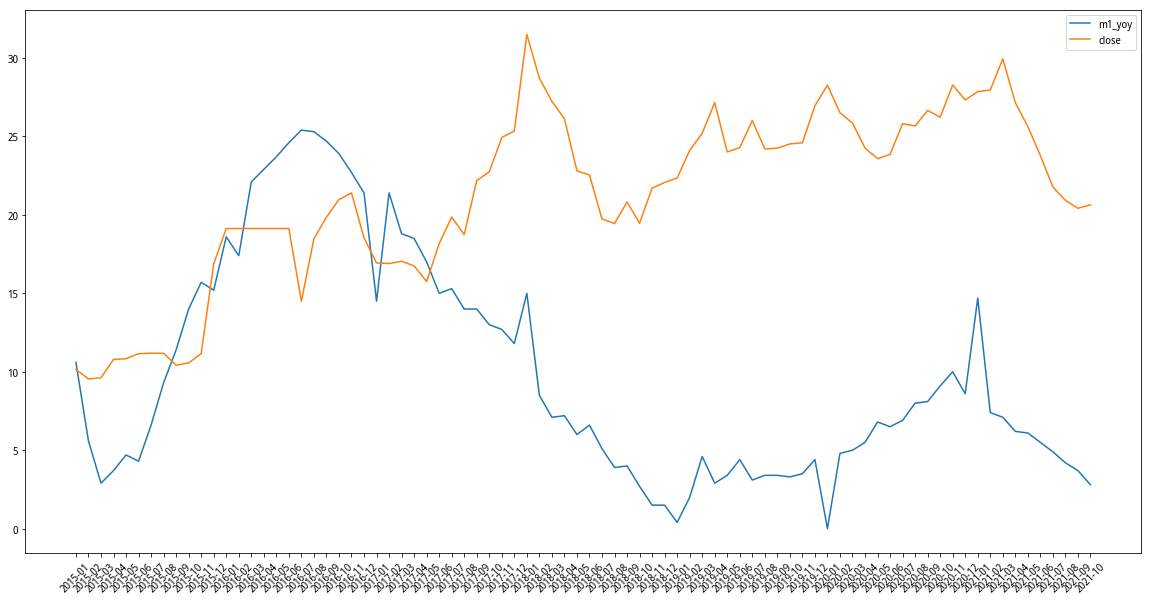

[[0.9999999999999999 -0.2638239329287495]
 [-0.2638239329287495 1.0]]


In [11]:
df_filter = df_money_price.loc[(df_money_price.stat_month>='2015-01')]
plot_lines(df_filter, 'stat_month', 'm1_yoy')
plot_lines(df_filter, 'stat_month', 'close', use_figure=False)
# plot_lines(df_filter, 'stat_month', 'm1')
plt.show()
print(np.corrcoef(df_filter.m1_yoy, df_filter.close))

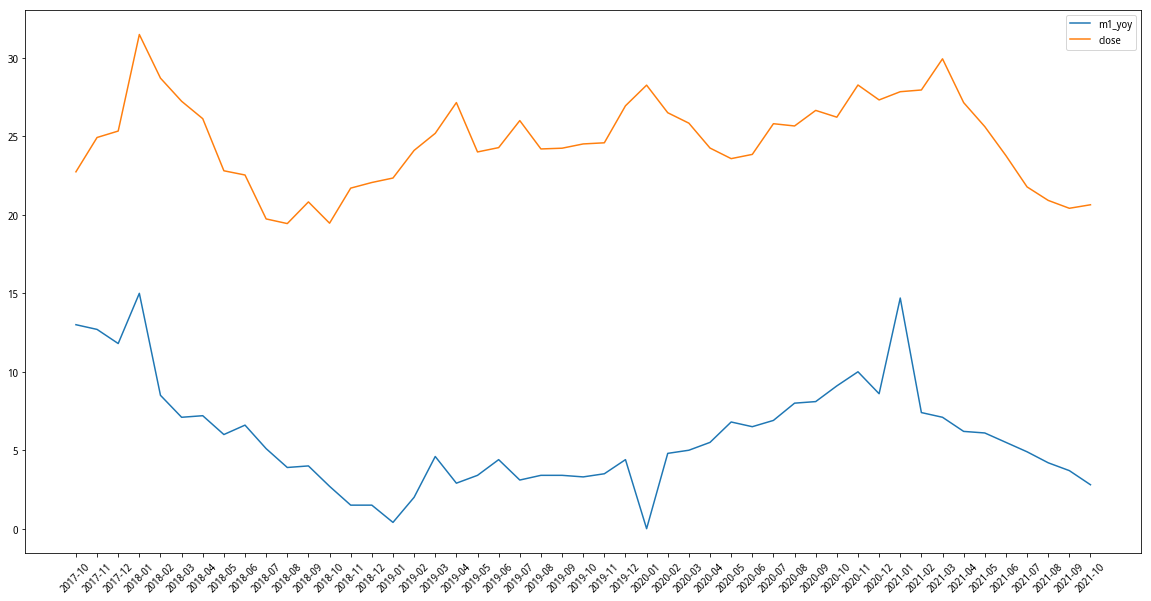

[[1.0 0.4701934268679014]
 [0.4701934268679014 1.0]]


In [16]:
df_filter = df_money_price.loc[(df_money_price.stat_month>='2017-10')]
plot_lines(df_filter, 'stat_month', 'm1_yoy')
plot_lines(df_filter, 'stat_month', 'close', use_figure=False)
# plot_lines(df_filter, 'stat_month', 'm1')
plt.show()
print(np.corrcoef(df_filter.m1_yoy, df_filter.close))

In [ ]:
从

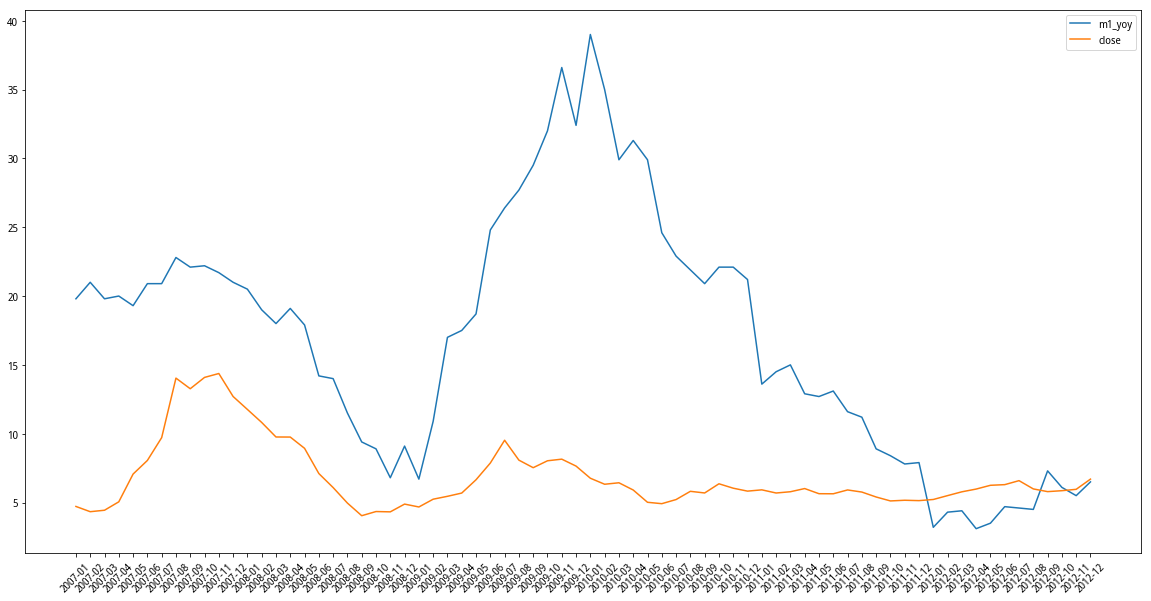

[[1.0 0.3512102663309185]
 [0.3512102663309185 1.0]]


In [14]:
df_filter = df_money_price.loc[(df_money_price.stat_month>='2007-01') & (df_money_price.stat_month<'2013-01')]
plot_lines(df_filter, 'stat_month', 'm1_yoy')
plot_lines(df_filter, 'stat_month', 'close', use_figure=False)
# plot_lines(df_filter, 'stat_month', 'm1')
plt.show()
print(np.corrcoef(df_filter.m1_yoy, df_filter.close))

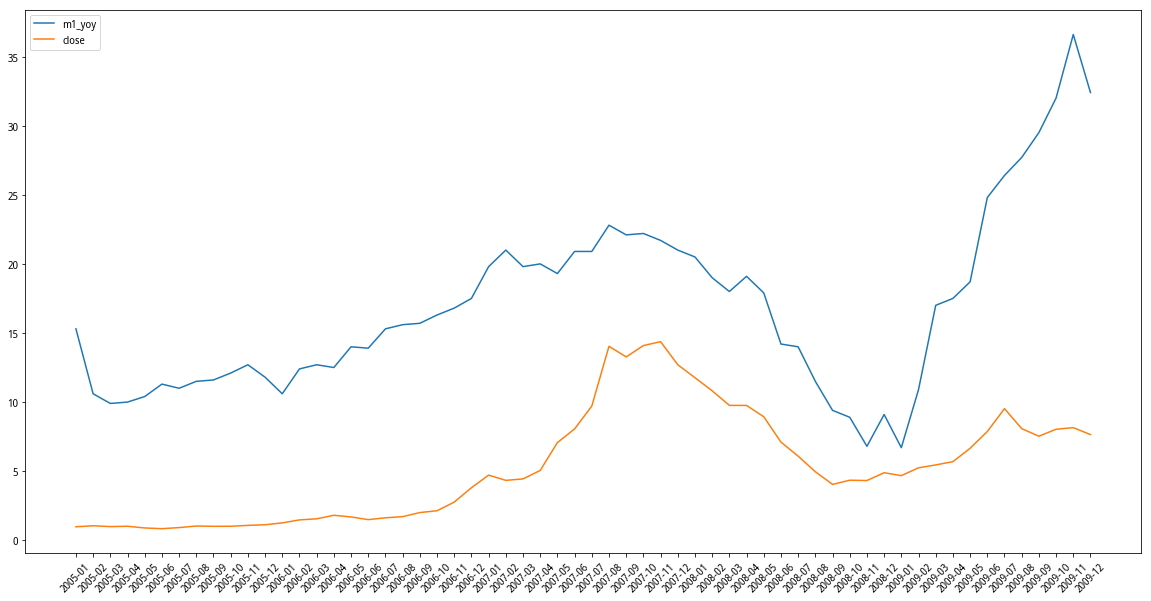

[[1.0 0.6319089585427909]
 [0.6319089585427909 1.0]]


In [21]:
df_filter = df_money_price.loc[(df_money_price.stat_month>='2000-01') & (df_money_price.stat_month<'2010-01')]
plot_lines(df_filter, 'stat_month', 'm1_yoy')
plot_lines(df_filter, 'stat_month', 'close', use_figure=False)
# plot_lines(df_filter, 'stat_month', 'm1')
plt.show()
print(np.corrcoef(df_filter.m1_yoy, df_filter.close))